In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [16]:
years = [2019, 2023]
url_raw = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear="

In [17]:
def process_year_data(year):
    file_name = f"checkouts{year}_file.csv"
    urllib.request.urlretrieve(f"{url_raw}{year}", file_name)
    df = pd.read_csv(file_name)
    mediatype_df = df["materialtype"].value_counts()
    mediatype_df.to_csv(f"materialtype{year}.csv")
    keep_col = ["BOOK", "EBOOK", "AUDIOBOOK", "VIDEODISC", "SOUNDDISC", "MUSIC"]
    mediatype_df = mediatype_df[keep_col]
    return mediatype_df

In [18]:
mediatypes =[]
for year in years:
    mediatype = process_year_data(year)
    mediatypes.append(mediatype)

In [19]:
mediatype_all = pd.concat(mediatypes, axis=1, ignore_index=True)
mediatype_all.columns = [str(year) for year in years]

Text(0.5, 1.0, 'Ausleihzahlen nach Medienart')

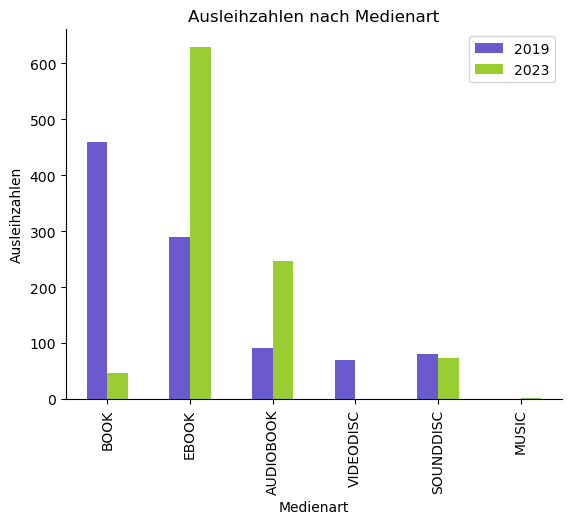

In [20]:
# Balkendiagramm

mediatype_all.plot(color=['slateblue', 'yellowgreen'], kind="bar")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend([str(year) for year in years])
plt.xlabel('Medienart')
plt.ylabel('Ausleihzahlen')
plt.title('Ausleihzahlen nach Medienart')

Text(0.5, 1.0, 'Ausleihzahlen nach Medienart')

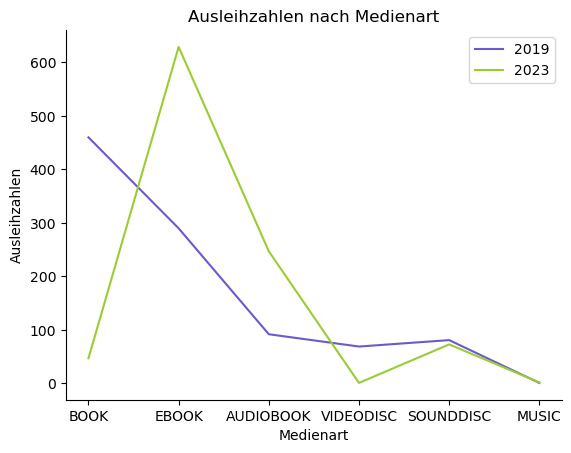

In [14]:
# Liniendiagramm

mediatype_all.plot(color=['slateblue', 'yellowgreen'])
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend([str(year) for year in years])
plt.xlabel('Medienart')
plt.ylabel('Ausleihzahlen')
plt.title('Ausleihzahlen nach Medienart')